In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df_2000_2021 = pd.read_csv('df_NOAA_2000_2021.csv')

In [7]:
df_2000_2021 = df_2000_2021.drop(df_2000_2021.columns[0],axis='columns')
df_2000_2021.head()

,date,year,month,day,state,event_type,ev_type_grp,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property
0,2000-12-31,2000,12,31,FLORIDA,Extreme Cold/Wind Chill,Winter,0,0,0,0,0.0
1,2000-12-31,2000,12,31,FLORIDA,Extreme Cold/Wind Chill,Winter,0,0,0,0,0.0
2,2000-12-31,2000,12,31,FLORIDA,Extreme Cold/Wind Chill,Winter,0,0,0,0,0.0
3,2000-12-13,2000,12,13,WEST VIRGINIA,Winter Storm,Winter,0,0,0,0,0.0
4,2000-08-03,2000,8,3,MISSISSIPPI,Thunderstorm Wind,Strong Wind,0,0,0,0,3500.0


### Foucs on analysis of damage property


In [8]:
df_property_loss = df_2000_2021[['date','year','month','day','state','ev_type_grp','event_type','damage_property']]
df_property_loss

,date,year,month,day,state,ev_type_grp,event_type,damage_property
0,2000-12-31,2000,12,31,FLORIDA,Winter,Extreme Cold/Wind Chill,0.0
1,2000-12-31,2000,12,31,FLORIDA,Winter,Extreme Cold/Wind Chill,0.0
2,2000-12-31,2000,12,31,FLORIDA,Winter,Extreme Cold/Wind Chill,0.0
3,2000-12-13,2000,12,13,WEST VIRGINIA,Winter,Winter Storm,0.0
4,2000-08-03,2000,8,3,MISSISSIPPI,Strong Wind,Thunderstorm Wind,3500.0
...,...,...,...,...,...,...,...,...
1250336,2021-11-23,2021,11,23,IDAHO,Winter,Winter Weather,0.0
1250337,2021-12-18,2021,12,18,IDAHO,Winter,Winter Storm,0.0
1250338,2021-12-30,2021,12,30,COLORADO,Strong Wind,High Wind,0.0
1250339,2021-12-30,2021,12,30,COLORADO,Strong Wind,High Wind,0.0


In [9]:
df_property_loss.damage_property.describe()

count    1.250341e+06
mean     3.629691e+05
std      6.077965e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.132500e+10
Name: damage_property, dtype: float64

Most of the extreme weather events actually cause zero damage (~73%) 

In [10]:
df_property_loss_zero = df_property_loss[df_property_loss.damage_property == 0]
df_property_loss_zero

,date,year,month,day,state,ev_type_grp,event_type,damage_property
0,2000-12-31,2000,12,31,FLORIDA,Winter,Extreme Cold/Wind Chill,0.0
1,2000-12-31,2000,12,31,FLORIDA,Winter,Extreme Cold/Wind Chill,0.0
2,2000-12-31,2000,12,31,FLORIDA,Winter,Extreme Cold/Wind Chill,0.0
3,2000-12-13,2000,12,13,WEST VIRGINIA,Winter,Winter Storm,0.0
7,2000-01-21,2000,1,21,MAINE,Winter,Blizzard,0.0
...,...,...,...,...,...,...,...,...
1250336,2021-11-23,2021,11,23,IDAHO,Winter,Winter Weather,0.0
1250337,2021-12-18,2021,12,18,IDAHO,Winter,Winter Storm,0.0
1250338,2021-12-30,2021,12,30,COLORADO,Strong Wind,High Wind,0.0
1250339,2021-12-30,2021,12,30,COLORADO,Strong Wind,High Wind,0.0


See the distribution of damage property less events causing 0 damage

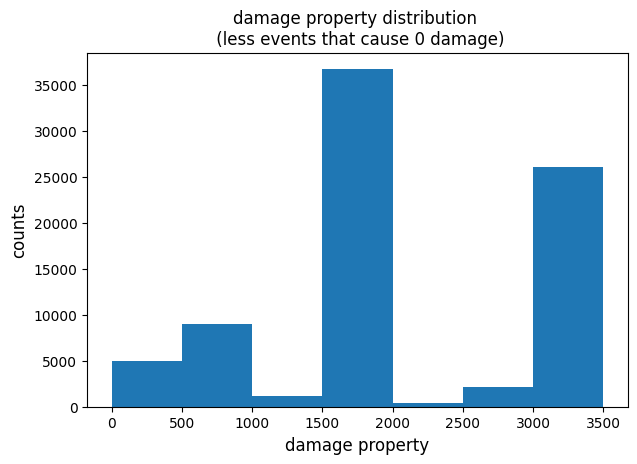

In [11]:
df_property_loss_nonzero = df_property_loss[df_property_loss.damage_property != 0]

fig, ax = plt.subplots(1, figsize=(6,4))
fig.tight_layout(pad=0.6)

ax.hist(df_property_loss_nonzero.damage_property, bins=range(0,4000,500))
ax.set_xlabel("damage property", fontsize=12)
ax.set_ylabel("counts", fontsize=12)
ax.set_title("damage property distribution \n (less events that cause 0 damage)", fontsize=12)
pass

Not all extreme weather events cause damage. They can land in nowhere, or too mild to cause any damage.

We notice that most of the events don’t actually deal any damage except rain, strong wind, and tornado. About twenty to thirty percent of them do cause damage. 

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\317489224.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_zero_loss.index, rotation=45, fontsize=10)


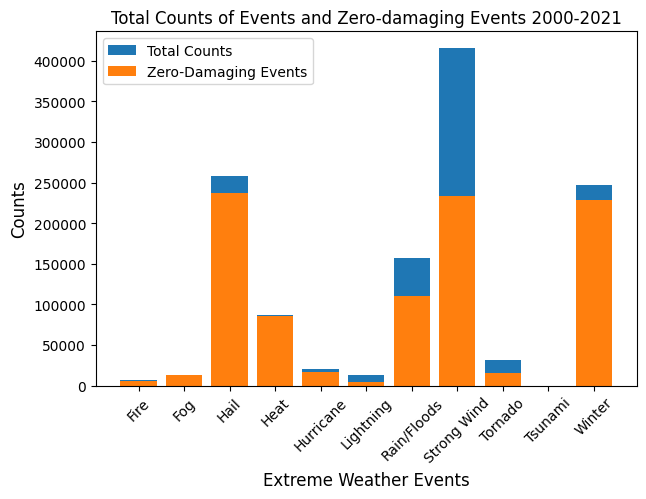

In [12]:
df_zero_loss = df_property_loss_zero[['damage_property','ev_type_grp']].groupby("ev_type_grp").count()
df_all = df_property_loss[['damage_property','ev_type_grp']].groupby("ev_type_grp").count()

fig, ax = plt.subplots(1, figsize=(6,4))
fig.tight_layout(pad=0.6)

ax.bar(df_all.index, df_all['damage_property'])
ax.bar(df_zero_loss.index, df_zero_loss['damage_property'])

ax.set_xlabel("Extreme Weather Events", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
ax.set_title("Total Counts of Events and Zero-damaging Events 2000-2021", fontsize=12)
ax.set_xticklabels(df_zero_loss.index, rotation=45, fontsize=10)
plt.legend(["Total Counts","Zero-Damaging Events"])
pass

Group by casual terms, see the damage property caused by every extreme weather events

In [13]:
#Property loss from 2000 to 2021
df_loss_20 = df_property_loss_nonzero[['damage_property','ev_type_grp']].groupby(df_property_loss_nonzero.ev_type_grp).sum()
df_loss_20 = df_loss_20.sort_values('damage_property',ascending=False)
df_loss_20

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\3781508600.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_loss_20 = df_property_loss_nonzero[['damage_property','ev_type_grp']].groupby(df_property_loss_nonzero.ev_type_grp).sum()


,damage_property
ev_type_grp,
Hurricane,2.639191e+11
Rain/Floods,9.939835e+10
Fire,4.078525e+10
Tornado,2.039375e+10
Strong Wind,1.483721e+10
Hail,1.122764e+10
Winter,2.159000e+09
Lightning,9.706247e+08
Heat,1.101314e+08


Hurricanes are actually the most destructive, despite rain, strong winds, and tornadoes have higher probability to cause damage. Hurricanes dealt with more than $250 billion dollars since 2000, and category 5 hurricane Katrina itself, caused over $125 billion in property loss.

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\946636998.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_loss_20.index, rotation=90, fontsize=10)
C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\946636998.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yaxis, fontsize=10)


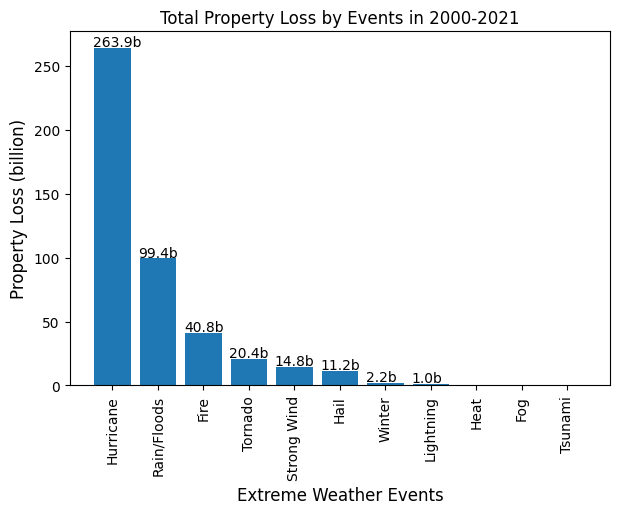

In [14]:
fig, ax = plt.subplots(1, figsize=(6,4))
fig.tight_layout(pad=0.6)

yaxis = [0, 50, 100, 150, 200, 250]
ax.bar(df_loss_20.index, df_loss_20['damage_property'])
ax.set_xlabel("Extreme Weather Events", fontsize=12)
ax.set_ylabel("Property Loss (billion)", fontsize=12)
ax.set_title("Total Property Loss by Events in 2000-2021", fontsize=12)
ax.set_xticklabels(df_loss_20.index, rotation=90, fontsize=10)
ax.set_yticklabels(yaxis, fontsize=10)

for i in range(8):
    plt.text(x = i-0.43,
            y = df_loss_20.iloc[i][0]+1500000000,
            s = str(round((df_loss_20.iloc[i][0]/1000000000),1)) + 'b', 
            fontsize=10)
pass

Damage property caused by extreme events by years since 2000

In [15]:
df_loss_year = df_property_loss_nonzero[['damage_property','ev_type_grp']].groupby(df_property_loss.year).sum()
df_loss_year.head()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\966223172.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_loss_year = df_property_loss_nonzero[['damage_property','ev_type_grp']].groupby(df_property_loss.year).sum()


,damage_property
year,
2000,3.415312e+09
2001,9.562199e+09
2002,7.434907e+08
2003,4.616022e+09
2004,2.900113e+10


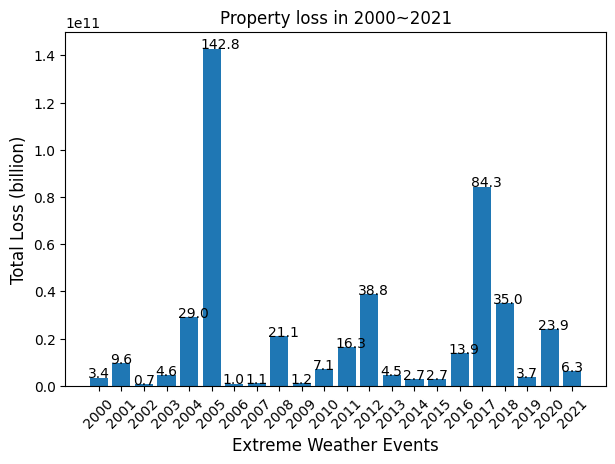

In [40]:
fig, ax = plt.subplots(1, figsize=(6,4))
fig.tight_layout(pad=0.6)

ax.bar(df_loss_year.index, df_loss_year['damage_property'])
ax.set_xlabel("Extreme Weather Events", fontsize=12)
ax.set_ylabel("Total Loss (billion)", fontsize=12)
ax.set_title("Property loss in 2000~2021", fontsize=12)
ax.set_xticks(df_loss_year.index)
ax.set_xticklabels(df_loss_year.index, rotation=45, fontsize=10)

#for value on top of the bar
for i in range(len(df_loss_year)):
    plt.text(x = df_loss_year.index[i]-0.5,
            y = df_loss_year.iloc[i][0]+10000000,
            s = str(round((df_loss_year.iloc[i][0]/1000000000),1)))
pass

Heat map, year as y axis and casual terms as x axis

In [17]:
df = pd.pivot_table(df_property_loss_nonzero,values='damage_property' , index='year', columns='ev_type_grp', aggfunc='sum')
df.fillna(value=0, inplace=True)
df


ev_type_grp,Fire,Fog,Hail,Heat,Hurricane,Lightning,Rain/Floods,Strong Wind,Tornado,Tsunami,Winter
year,,,,,,,,,,,
2000,2.653129e+09,3178000.0,6.745806e+07,2525250.0,6.563375e+06,45865067.5,1.859929e+08,2.752104e+08,8.093418e+07,0.0,94456267.5
2001,1.218420e+07,2245250.0,8.602570e+07,77000.0,8.816315e+09,53920475.0,1.901067e+08,2.453035e+08,1.138793e+08,0.0,42141575.0
2002,1.563678e+07,5223750.0,6.056214e+07,56875.0,2.646737e+07,53182675.0,1.429824e+08,2.649185e+08,8.910702e+07,0.0,85353275.0
2003,1.858775e+09,2931250.0,8.238575e+07,11316375.0,6.323835e+07,38218162.5,2.045656e+09,3.043777e+08,1.169526e+08,0.0,92170015.0
2004,5.065375e+06,270375.0,5.486194e+07,157500.0,2.807872e+10,37956800.0,2.687208e+08,3.555375e+08,1.291189e+08,0.0,70722050.0
2005,1.353012e+07,1123500.0,6.551008e+07,2387000.0,1.419159e+11,67252325.0,3.000959e+08,2.316427e+08,1.082298e+08,0.0,107592362.5
2006,2.248820e+07,1303750.0,1.064952e+08,31325000.0,1.251110e+07,61653165.0,2.176783e+08,3.481549e+08,1.264662e+08,166250.0,78769162.5
2007,3.141722e+07,770000.0,4.487044e+07,5997250.0,1.052810e+07,74904900.0,2.995916e+08,3.315072e+08,1.253825e+08,0.0,166760825.0
2008,1.347692e+07,1216250.0,8.727302e+07,327250.0,1.949403e+10,61623030.0,4.619183e+08,5.755762e+08,2.301111e+08,0.0,161290780.0


Tsunami rarely cause damage compare to other extreme events

In [18]:
df = df.drop('Tsunami', axis='columns')

Translate it to log format

In [19]:
for cols in df.columns:
    df[cols] = np.log10(df[cols])

As you can see in the heatmap and data set down below, not all events cause evenly damage every year.

Severe fire events happened in 2018, according to history, The 2018 wildfire season was the deadliest and most destructive wildfire season in California history including $25.4 billion in property damage. 

As for hurricanes, the Notorious hurricane Katrina hit Florida in 2005 leaving traumatized memory for Americans.


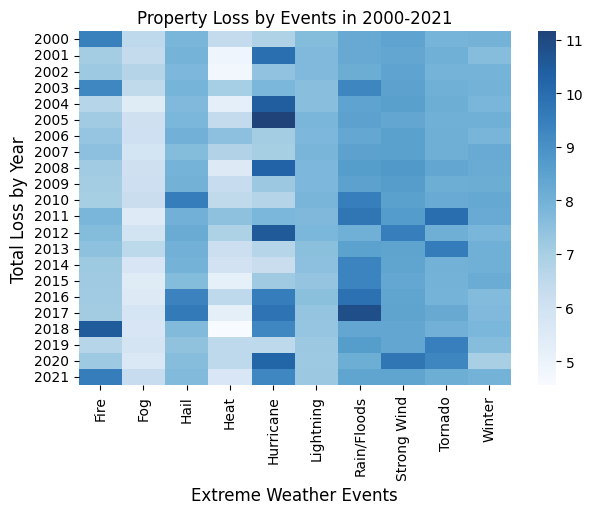

In [20]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(6,4))
fig.tight_layout(pad=0.6)

ax = sns.heatmap(df, annot=False, cmap='Blues', alpha=0.9)
ax.set_title("Property Loss by Events in 2000-2021", fontsize=12)
ax.set_xticklabels(df.columns, rotation=90, fontsize=10)
ax.set_ylabel("Total Loss by Year", fontsize=12)
ax.set_xlabel("Extreme Weather Events", fontsize=12)
pass

See the ratio of damage property for every event

In [21]:
df = pd.pivot_table(df_property_loss_nonzero,values='damage_property' , index='year', columns='ev_type_grp', aggfunc='sum')
df.fillna(value=0, inplace=True)
df['total_loss'] = df_property_loss_nonzero[['damage_property','year']].groupby('year').sum()
df

for col in df.columns:
    df[col] = df[col] / df['total_loss']
df = df.drop('total_loss', axis=1)
df

ev_type_grp,Fire,Fog,Hail,Heat,Hurricane,Lightning,Rain/Floods,Strong Wind,Tornado,Tsunami,Winter
year,,,,,,,,,,,
2000,0.776833,0.000931,0.019752,0.000739,0.001922,0.013429,0.054459,0.080581,0.023697,0.000000,0.027657
2001,0.001274,0.000235,0.008996,0.000008,0.921997,0.005639,0.019881,0.025653,0.011909,0.000000,0.004407
2002,0.021032,0.007026,0.081456,0.000076,0.035599,0.071531,0.192312,0.356317,0.119850,0.000000,0.114801
2003,0.402679,0.000635,0.017848,0.002452,0.013700,0.008279,0.443164,0.065939,0.025336,0.000000,0.019967
2004,0.000175,0.000009,0.001892,0.000005,0.968194,0.001309,0.009266,0.012259,0.004452,0.000000,0.002439
2005,0.000095,0.000008,0.000459,0.000017,0.993717,0.000471,0.002101,0.001622,0.000758,0.000000,0.000753
2006,0.022332,0.001295,0.105754,0.031107,0.012424,0.061224,0.216163,0.345731,0.125586,0.000165,0.078221
2007,0.028777,0.000705,0.041100,0.005493,0.009644,0.068611,0.274419,0.303653,0.114848,0.000000,0.152749
2008,0.000639,0.000058,0.004139,0.000016,0.924464,0.002922,0.021906,0.027296,0.010913,0.000000,0.007649


In [22]:
df = df[['Strong Wind','Rain/Floods','Tornado','Hurricane','Hail','Winter','Fire','Lightning','Heat','Fog','Tsunami']]

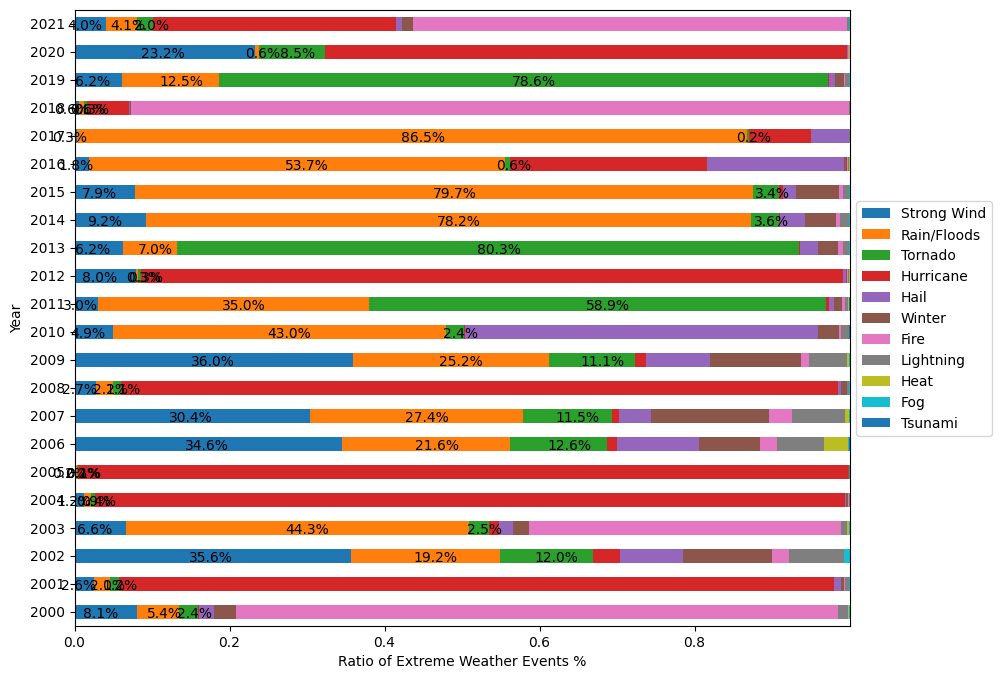

In [23]:
fig, ax = plt.subplots(figsize = (12, 8))
df.plot(kind='barh', stacked=True, legend=True, figsize=(10,8), ax=ax)

plt.legend(df.columns, bbox_to_anchor=(1.0, 0.7))
plt.xlabel('Ratio of Extreme Weather Events %')
plt.ylabel('Year')

#Percetage for strong wind
for i in range(len(df)): 
     installed = df.iloc[i][0]
     plt.text(x = df.iloc[i][0]/2-0.03,
     y = i - 0.2,
     s = (str(round(installed * 100, 1))) + '%')

#Percetage for rain
for i in range(len(df)): 
     installed = df.iloc[i][1]
     plt.text(x = df.iloc[i][0] + df.iloc[i][1]/2-0.015,
     y = i - 0.2,
     s = (str(round(installed * 100, 1))) + '%')

#Percetage for tornado
for i in range(len(df)): 
     installed = df.iloc[i][2]
     plt.text(x = df.iloc[i][0] + df.iloc[i][1] + df.iloc[i][2]/2-0.015,
     y = i - 0.2,
     s = (str(round(installed * 100, 1))) + '%')


Found out that is there any seasonal effect on extreme weather events

In [24]:
df = pd.pivot_table(df_property_loss_nonzero,values='damage_property' , index='month', columns='ev_type_grp', aggfunc='sum')
df = df.fillna(0)
df

ev_type_grp,Fire,Fog,Hail,Heat,Hurricane,Lightning,Rain/Floods,Strong Wind,Tornado,Tsunami,Winter
month,,,,,,,,,,,
1,1.518808e+07,8512000.0,5.421971e+07,4050025.0,1.998622e+07,7629195.0,2.508647e+08,3.243399e+08,1.449294e+08,0.0,481617640.0
2,9.983960e+06,7024500.0,2.849866e+07,1397375.0,5.612250e+06,13538000.0,2.706491e+08,3.414218e+08,1.741393e+08,533750.0,610248660.0
3,3.026432e+07,2341500.0,1.873668e+08,805875.0,9.037000e+06,31773875.0,4.085287e+08,4.258928e+08,2.194830e+09,1793750.0,219897737.5
4,4.273672e+07,585375.0,2.729425e+09,2219437.5,1.249412e+07,60281462.5,4.966479e+08,7.399998e+08,5.046489e+09,0.0,101214610.0
5,2.650603e+09,1128750.0,4.350420e+09,932750.0,3.100125e+06,107256135.0,1.049948e+10,7.753259e+08,8.872861e+09,0.0,8442875.0
6,6.855520e+07,306250.0,3.423203e+08,5937750.0,8.821726e+09,201565770.0,9.407772e+08,1.147306e+09,2.504999e+08,0.0,2061150.0
7,2.686283e+09,122500.0,1.625356e+08,31995600.0,2.695318e+09,244997952.5,8.342150e+08,9.670795e+08,1.745722e+08,0.0,87500.0
8,7.078960e+07,966000.0,1.032336e+08,22025412.5,1.447331e+11,224161402.5,8.248743e+10,7.001695e+08,1.361045e+08,0.0,0.0
9,5.798268e+07,1667750.0,4.747612e+07,1961750.0,4.953822e+10,48866825.0,6.478409e+08,5.686000e+09,1.215100e+08,0.0,1721125.0


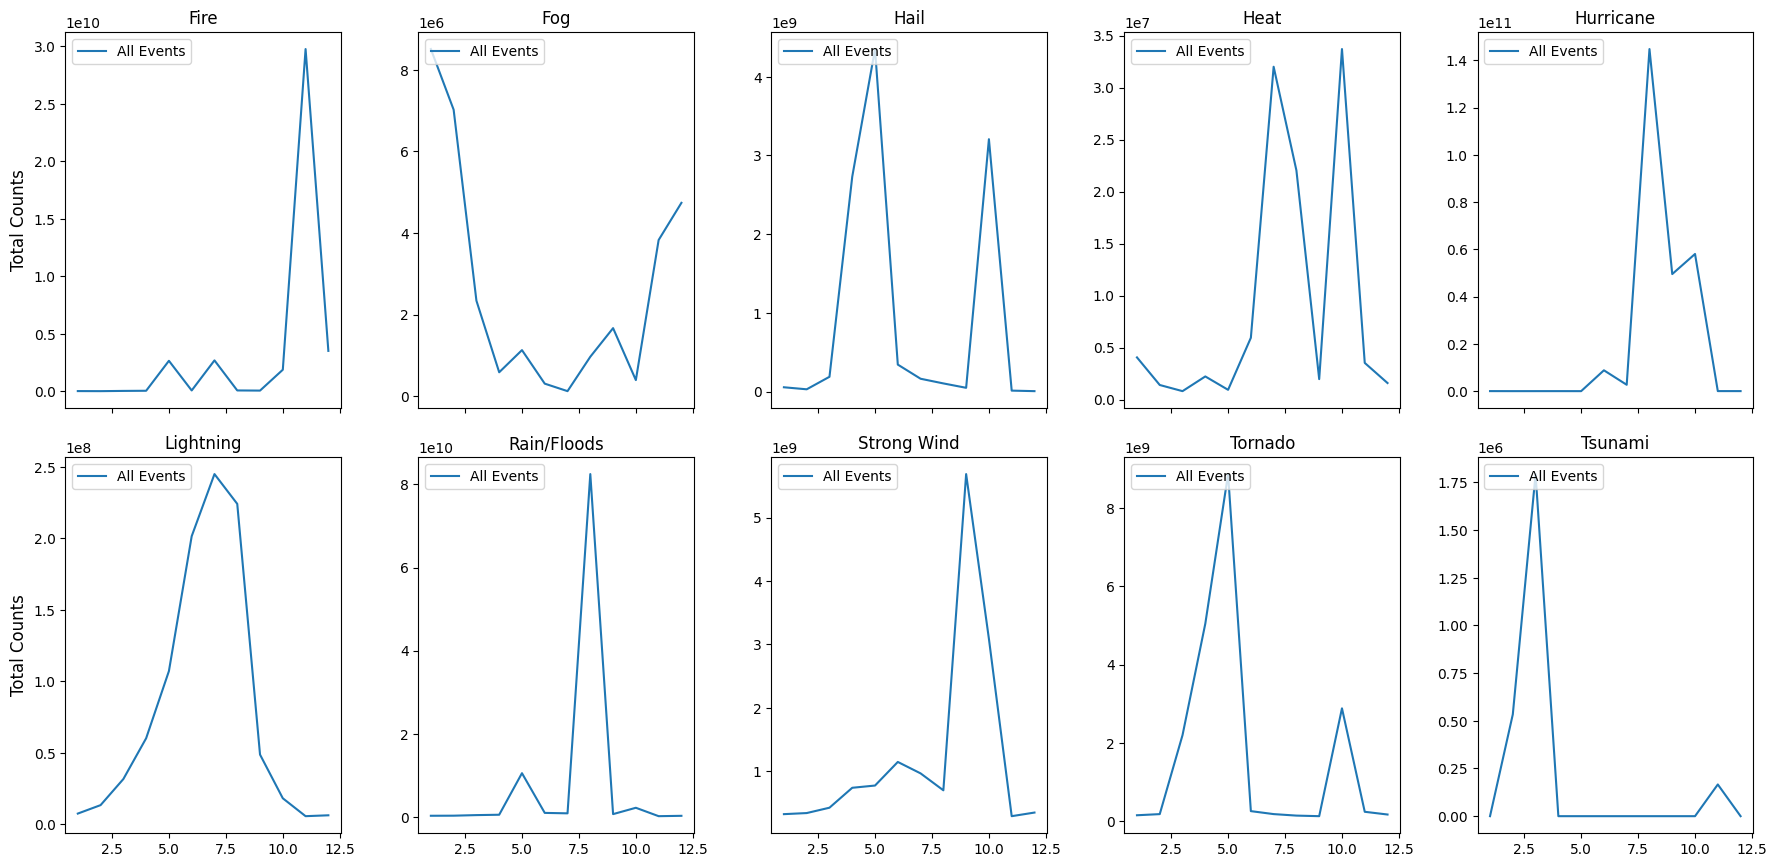

In [25]:
fig, ax = plt.subplots(2,5, figsize=(18,9), sharex=True)
fig.tight_layout(pad=2.5)

k = 0
for i in range(2):
    for j in range(5):
        ax[i][j].plot(df.index, df[df.columns[k]])
        ax[i][j].set_title(df.columns[k],fontsize=12)
        ax[i][j].legend(["All Events","Events Causing Damage"],loc='upper left')
        k = k + 1
        
ax[0][0].set_ylabel("Total Counts", fontsize=12)
ax[1][0].set_ylabel("Total Counts", fontsize=12)
pass

See the distribution of damage property of every single event by year

In [46]:
df = df_property_loss_nonzero[['date','ev_type_grp','damage_property']]
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime("%Y-%m-01")
df['date'] = pd.to_datetime(df['date'])
df

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\1086169909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\1086169909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].dt.strftime("%Y-%m-01")
C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\1086169909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,date,ev_type_grp,damage_property
4,2000-08-01,Strong Wind,3.500000e+03
5,2000-08-01,Strong Wind,3.500000e+03
6,2000-08-01,Strong Wind,1.750000e+03
20,2000-02-01,Strong Wind,1.750000e+04
21,2000-01-01,Strong Wind,8.750000e+03
...,...,...,...
1250281,2021-12-01,Strong Wind,3.500000e+03
1250328,2021-11-01,Strong Wind,1.750000e+03
1250329,2021-11-01,Strong Wind,1.050000e+04
1250330,2021-11-01,Strong Wind,1.837500e+05


In [48]:
df.damage_property = np.log10(df.damage_property)
df

C:\Users\Ryan\AppData\Local\Temp\ipykernel_17392\3142834956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.damage_property = np.log10(df.damage_property)


,date,ev_type_grp,damage_property
4,2000-08-01,Strong Wind,0.549502
5,2000-08-01,Strong Wind,0.549502
6,2000-08-01,Strong Wind,0.510952
20,2000-02-01,Strong Wind,0.627677
21,2000-01-01,Strong Wind,0.595718
...,...,...,...
1250281,2021-12-01,Strong Wind,0.549502
1250328,2021-11-01,Strong Wind,0.510952
1250329,2021-11-01,Strong Wind,0.604355
1250330,2021-11-01,Strong Wind,0.721335


In [49]:
terms = df_property_loss_nonzero.ev_type_grp.unique()
terms.sort()
terms

array(['Fire', 'Fog', 'Hail', 'Heat', 'Hurricane', 'Lightning',
       'Rain/Floods', 'Strong Wind', 'Tornado', 'Tsunami', 'Winter'],
      dtype=object)

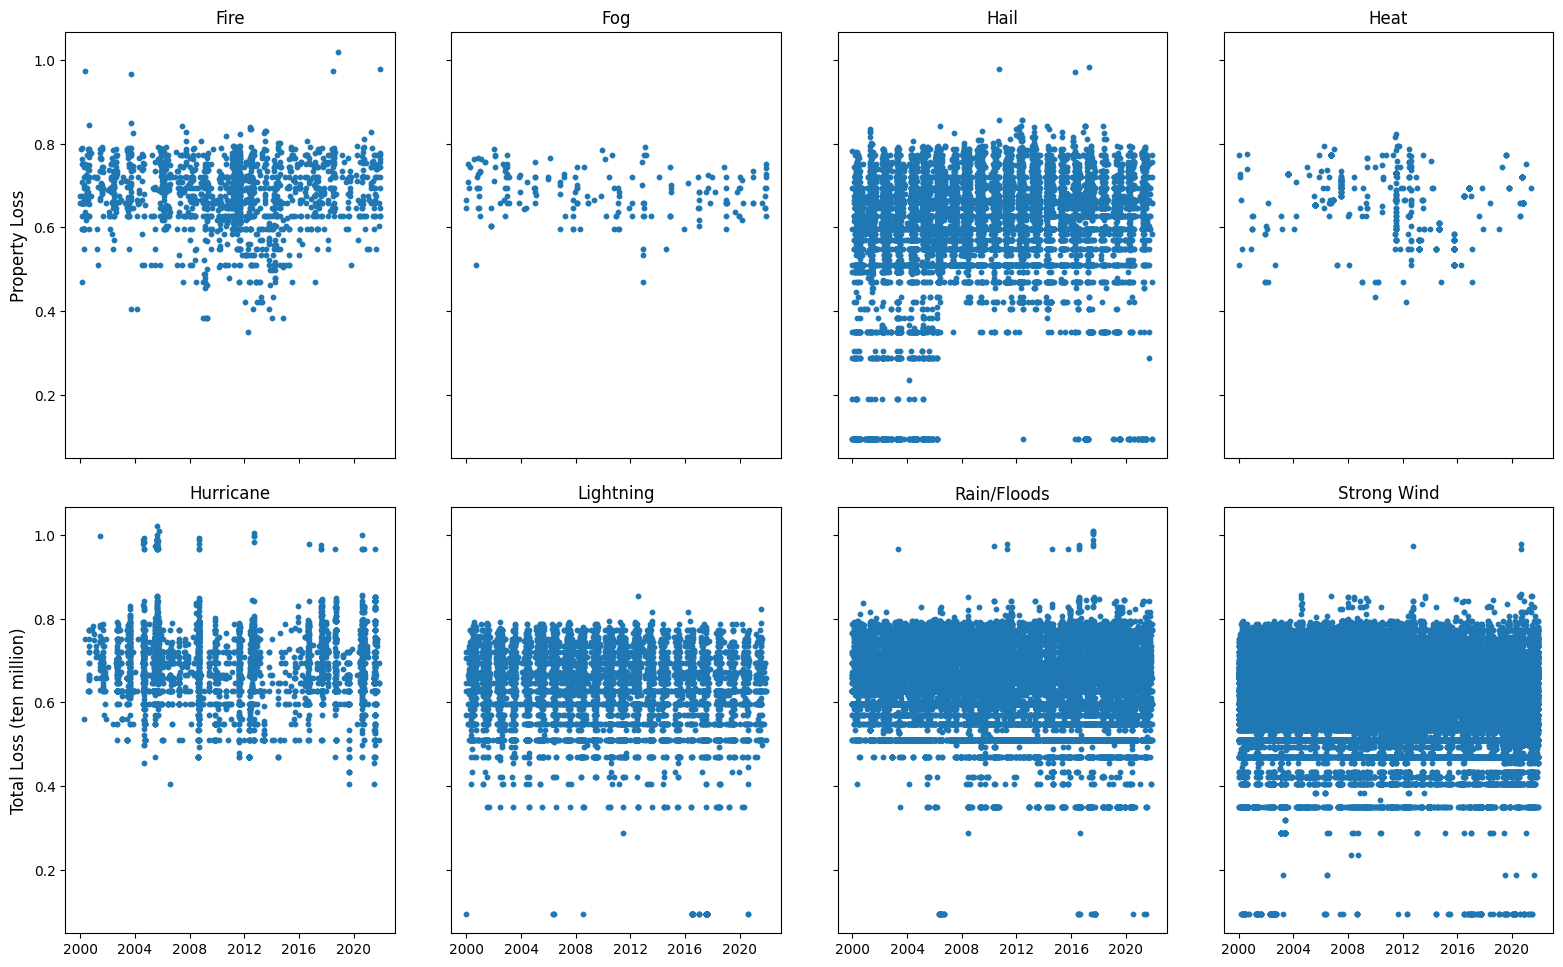

In [53]:
fig, ax = plt.subplots(2,4, figsize=(16,10),sharey=True, sharex=True)
fig.tight_layout(pad=2.5)

k = 0
for i in range(2):
    for j in range(4):
        ax[i][j].scatter(df[df.ev_type_grp == terms[k]].date, df['damage_property'][df.ev_type_grp == terms[k]], s=10)
        ax[i][j].set_title(terms[k],fontsize=12)
        #ax[i][j].set_xlabel("Year", fontsize=12)
        k = k + 1

ax[0][0].set_ylabel("Property Loss", fontsize=12)
ax[1][0].set_ylabel("Total Loss (ten million)", fontsize=12)
pass

#Most of the damages are mild, but Rain and Hurricane have righ skew effect. Damage is getting severe over time

See the non-zero and all events frequency by year

In [59]:
df_all = pd.pivot_table(df_property_loss,values='damage_property' , index='year', columns='ev_type_grp', aggfunc='count')
df_all.fillna(value=0, inplace=True)
df_all = df_all.drop(df_all.columns[9],axis='columns')
df_all

ev_type_grp,Fire,Fog,Hail,Heat,Hurricane,Lightning,Rain/Floods,Strong Wind,Tornado,Winter
year,,,,,,,,,,
2000,370.0,476.0,11290.0,3707.0,313.0,904.0,4553.0,16122.0,1406.0,12318.0
2001,239.0,637.0,12223.0,3582.0,526.0,874.0,5315.0,15449.0,1506.0,7843.0
2002,411.0,405.0,12540.0,3561.0,530.0,870.0,5512.0,15776.0,1039.0,8534.0
2003,309.0,305.0,13915.0,1299.0,763.0,729.0,6948.0,15103.0,1535.0,9628.0
2004,166.0,338.0,13164.0,660.0,1224.0,704.0,7487.0,15207.0,1946.0,9103.0
2005,204.0,310.0,13808.0,2184.0,1951.0,862.0,6059.0,15252.0,1342.0,9568.0
2006,420.0,681.0,16656.0,4489.0,829.0,836.0,4556.0,18144.0,1262.0,6431.0
2007,266.0,780.0,12711.0,4593.0,772.0,722.0,6252.0,16065.0,1240.0,13609.0
2008,335.0,559.0,17768.0,2284.0,1329.0,795.0,7072.0,22263.0,1954.0,14583.0


In [60]:
df_nonzero = df_property_loss_nonzero 
df_nonzero

,date,year,month,day,state,ev_type_grp,event_type,damage_property
4,2000-08-03,2000,8,3,MISSISSIPPI,Strong Wind,Thunderstorm Wind,3.500000e+03
5,2000-08-09,2000,8,9,MISSISSIPPI,Strong Wind,Thunderstorm Wind,3.500000e+03
6,2000-08-09,2000,8,9,MISSISSIPPI,Strong Wind,Thunderstorm Wind,1.750000e+03
20,2000-02-13,2000,2,13,NORTH CAROLINA,Strong Wind,Thunderstorm Wind,1.750000e+04
21,2000-01-13,2000,1,13,MARYLAND,Strong Wind,High Wind,8.750000e+03
...,...,...,...,...,...,...,...,...
1250281,2021-12-01,2021,12,1,MONTANA,Strong Wind,Strong Wind,3.500000e+03
1250328,2021-11-15,2021,11,15,MONTANA,Strong Wind,Strong Wind,1.750000e+03
1250329,2021-11-15,2021,11,15,MONTANA,Strong Wind,High Wind,1.050000e+04
1250330,2021-11-15,2021,11,15,MONTANA,Strong Wind,High Wind,1.837500e+05


In [61]:
df_nonzero = df_nonzero[df_nonzero.damage_property > 10000]
df_nonzero

,date,year,month,day,state,ev_type_grp,event_type,damage_property
20,2000-02-13,2000,2,13,NORTH CAROLINA,Strong Wind,Thunderstorm Wind,1.750000e+04
22,2000-01-28,2000,1,28,GEORGIA,Winter,Ice Storm,5.738250e+04
24,2000-01-25,2000,1,25,NEW YORK,Winter,Winter Storm,2.625000e+04
25,2000-01-25,2000,1,25,NEW YORK,Winter,Winter Storm,3.500000e+04
26,2000-01-25,2000,1,25,NEW YORK,Winter,Winter Storm,8.750000e+04
...,...,...,...,...,...,...,...,...
1250252,2021-12-10,2021,12,10,IDAHO,Strong Wind,Strong Wind,2.275000e+04
1250278,2021-12-23,2021,12,23,MONTANA,Strong Wind,Strong Wind,1.750000e+06
1250329,2021-11-15,2021,11,15,MONTANA,Strong Wind,High Wind,1.050000e+04
1250330,2021-11-15,2021,11,15,MONTANA,Strong Wind,High Wind,1.837500e+05


In [62]:
df_nonzero = pd.pivot_table(df_nonzero,values='damage_property' , index='year', columns='ev_type_grp', aggfunc='count')
df_nonzero.fillna(value=0, inplace=True)
df_nonzero = df_nonzero.drop(df_nonzero.columns[9],axis='columns')
df_nonzero 

ev_type_grp,Fire,Fog,Hail,Heat,Hurricane,Lightning,Rain/Floods,Strong Wind,Tornado,Winter
year,,,,,,,,,,
2000,71.0,16.0,674.0,6.0,21.0,386.0,1118.0,3286.0,403.0,1050.0
2001,32.0,10.0,657.0,2.0,59.0,364.0,1175.0,2837.0,543.0,369.0
2002,69.0,14.0,563.0,2.0,147.0,378.0,953.0,3072.0,419.0,544.0
2003,59.0,14.0,655.0,52.0,164.0,290.0,1484.0,3151.0,532.0,589.0
2004,22.0,4.0,584.0,2.0,261.0,279.0,1478.0,3099.0,660.0,484.0
2005,30.0,7.0,530.0,28.0,536.0,398.0,1601.0,2967.0,475.0,954.0
2006,87.0,6.0,878.0,55.0,93.0,407.0,1010.0,4087.0,511.0,453.0
2007,51.0,8.0,436.0,43.0,75.0,437.0,1608.0,3176.0,544.0,1100.0
2008,56.0,11.0,732.0,5.0,425.0,481.0,2292.0,5200.0,1005.0,885.0


In [37]:
df_nonzero = df_nonzero[['Rain/Floods','Strong Wind','Hurricane','Lightning']]
df_nonzero

ev_type_grp,Rain/Floods,Strong Wind,Hurricane,Lightning
year,,,,
2000,1118.0,3286.0,21.0,386.0
2001,1175.0,2837.0,59.0,364.0
2002,953.0,3072.0,147.0,378.0
2003,1484.0,3151.0,164.0,290.0
2004,1478.0,3099.0,261.0,279.0
2005,1601.0,2967.0,536.0,398.0
2006,1010.0,4087.0,93.0,407.0
2007,1608.0,3176.0,75.0,437.0
2008,2292.0,5200.0,425.0,481.0


In [38]:
df_all = df_all[['Rain/Floods','Strong Wind','Hurricane','Lightning']]
df_all

ev_type_grp,Rain/Floods,Strong Wind,Hurricane,Lightning
year,,,,
2000,4553.0,16122.0,313.0,904.0
2001,5315.0,15449.0,526.0,874.0
2002,5512.0,15776.0,530.0,870.0
2003,6948.0,15103.0,763.0,729.0
2004,7487.0,15207.0,1224.0,704.0
2005,6059.0,15252.0,1951.0,862.0
2006,4556.0,18144.0,829.0,836.0
2007,6252.0,16065.0,772.0,722.0
2008,7072.0,22263.0,1329.0,795.0


The frequency of extreme events are increasing but not for high-cost disasters. We can see there are upward trends in rains, strong winds, and hurricanes. However, the number of severe events causing more than 10,000 dollars somehow remains steady since 2000

The frequency of lightning across the country is decreasing on average, but not for California. The increasing frequency of lightning ignite wildfires and   threaten residents’ safety there. 

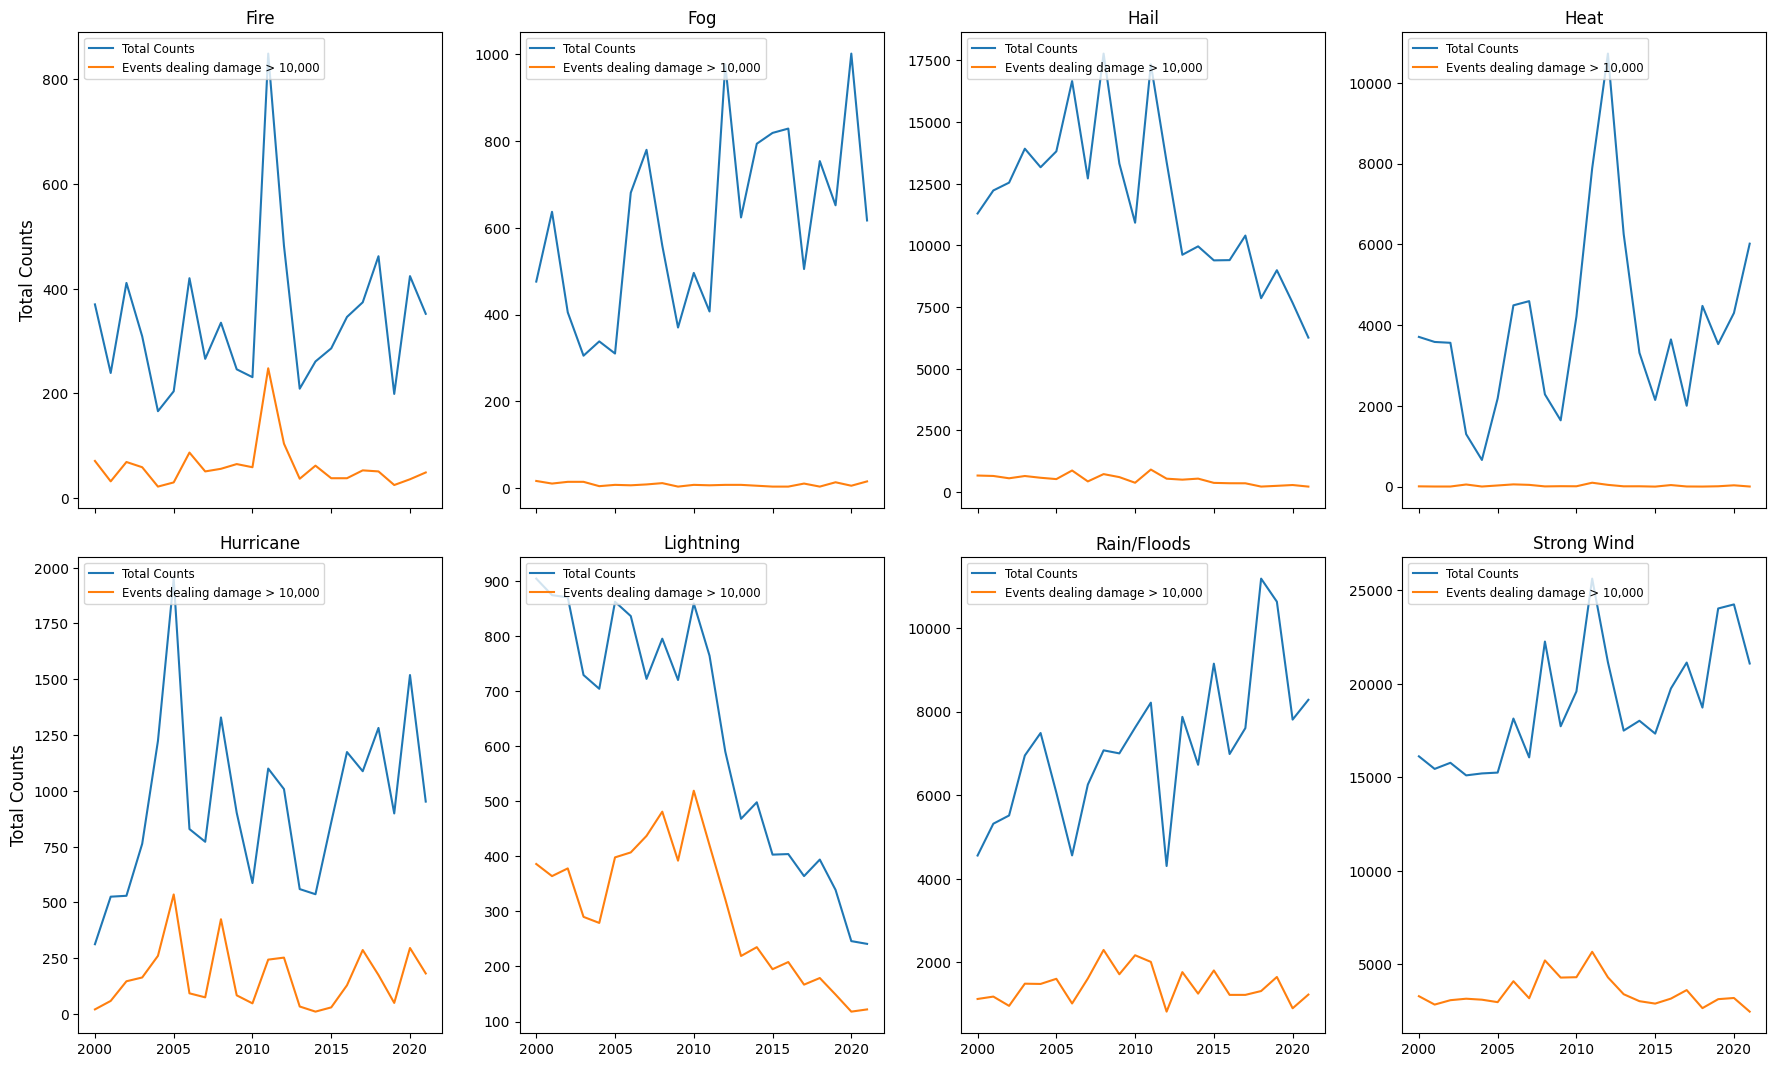

In [67]:
fig, ax = plt.subplots(2,4, figsize=(18,11), sharex=True)
fig.tight_layout(pad=2.5)

k = 0
for i in range(2):
    for j in range(4):
        ax[i][j].plot(df_all.index, df_all[df_all.columns[k]])
        ax[i][j].plot(df_nonzero.index, df_nonzero[df_nonzero.columns[k]])
        ax[i][j].set_title(df_all.columns[k],fontsize=12)
        ax[i][j].legend(["Total Counts","Events dealing damage > 10,000"],loc='upper left',fontsize=8.5)
        #ax[i][j].set_xlabel("Year", fontsize=12)
        k = k + 1     
ax[0][0].set_ylabel("Total Counts", fontsize=12)
ax[1][0].set_ylabel("Total Counts", fontsize=12)
#ax[1][0].set_ylabel("Total Counts", fontsize=12)
pass